### Problem Description

Using the dataset of several hundred bank users, we will train a self-organizing map model, and with it detect user with the unusal behaviour. In addition, our model will help us target those bank customers who could be abusing their credit cards. 

After this, we will use our data to train a simple artificial neural network, to predict the probability of potential fraud actually happening.

### The Approach

This project consists of the following steps:

1. Importing and preprocessing the data for trainig the model
2. Training the SOM model and visualizing the results
3. Targeting the potential frauds
4. Building and training the ANN
5. Predicting the probabilities of potential frauds

### Importing and Preprocessing the Data

First we'll import and scale the data, so it can be used to train our model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')

data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Each column of the dataset represent some information about a bank user. What each column represents is obscured because of the confidentiality. This is a problem which can be actually tackled only by a machine, since for a human it's not possible to make sense and percive patterns in a data presented this way.

The last collumn in the dataset tells wheather the credit card application was or wasn't approved by a bank. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


We see that we have quite clean data at hands. We will construct matrix of features using all the last column. Since this is an unsupervised model, the last column will be used later for labeling. We keep the first column `Customer ID` in the training set, even though it has no predictive power. Becouse each ID is unique, it won't affect detecting the behaviour patterns, and we will actually need it for the future reference. We also scale the data using the `MinMaxScaler`. 

In [4]:
customers = data['CustomerID']
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X.shape

(690, 15)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)

### Training the SOM and Visualizing the Results


It's time to train our SOM model. We will make a grid of 10x10 neural nodes, which will form an SOM mask. Sparse nodes, i.e. nodes that have only several other neural nodes in their neighborhood are considered as the outlier configurations, and can indicate a pontetial fraud. 

In [16]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = X.shape[1])
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

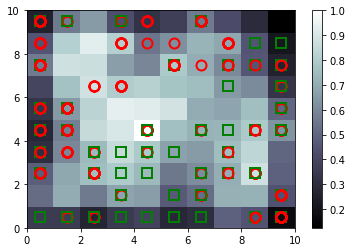

In [17]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In the above graph, each node cluster is represented by a small square. The darker the square is, the denser the cluster it is, i.e. it has more other neural nodes close to it. The white squares are the sparse nodes. They have none or a very small number of other nodes clustered around them, and they can imply potential frauds.

The squares and circles represent our customer data. The customres who belong to darker squares exhibit the usual behaviour. Those who fall into the white squares are the potential frauds. 

Red circles signify customers who had their credit card application rejected, while the green squares are for those who had their application approved. Red circle on the white square is a good thing, because it means that the suspicious behaviour was noticed by a bank clerk, and the application for the credid card didn't pass. However, the green rectangle on a white square is most likely a fraud: a customer with (probably unnoticed) suspicious behaviour was given a credit card.

### Finding the Potential Frauds

As we see above, we have a white square on the coordinates $(3,5)$, and within it both the red circle and the green square. This means that there are customers showing an unusal behaviour with the approved credit card, and that they could be potential frauds. The following code will extract and list those customers.

In [85]:
neural_nodes = som.win_map(X)
pot_frauds = neural_nodes[(4,4)]
pot_frauds = scaler.inverse_transform(pot_frauds)
pot_frauds = pot_frauds[:,0]
pot_frauds = np.array(pot_frauds, dtype = int)

print('The following customers are potential frauds, who had their credit card approved:\n')

for cust in pot_frauds:
    
    app = data[data['CustomerID'] == cust]['Class'].values
    
    if (bool(app)):
        app = 'Credit card approved, potential fraud!'
        print(f'Customer: {cust}')

The following customers are potential frauds, who had their credit card approved:

Customer: 15631685
Customer: 15753591
Customer: 15614813
Customer: 15594133
Customer: 15571081
Customer: 15706268
Customer: 15778142
Customer: 15715519
Customer: 15630592
Customer: 15589541
Customer: 15569595
Customer: 15598574
Customer: 15711759
Customer: 15808223


### Data Preprocessing for ANN

Now we want to build and train a logistic regression based ANN which will be able to tell us how probale the potential frauds actually are. But beforhand we need to build matrix of features and vector of labels. Matrix of features will encompas all the data, except the customer IDs, while the labels will signify whether the customer is a potential fraud or not. We also scale the values.

We will not make the split into a train and a test set, since we just want our model to give us the probabilites of the detected potential frauds.

In [54]:
X_ann = data.iloc[:,1:].values


fraud_idx = []
y_ann = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in pot_frauds:
        y_ann[i] = 1
        fraud_idx.append(i)
        
X_ann.shape

(690, 15)

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_ann = sc.fit_transform(X_ann)

### Training the ANN


Now we train our ANN with the most simple architecture: the hidden layer consists of just two nodes, and the output of a single node, which should give us a probability of the fraud happening.  

In [44]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()

ann.add(Dense(input_dim = X_ann.shape[1], units = 2, 
             activation = 'relu', kernel_initializer = 'uniform'))
ann.add(Dense(units = 1, activation = 'sigmoid',
             kernel_initializer = 'uniform'))

In [45]:
ann.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [46]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [47]:
ann.fit(X_ann, y_ann, epochs = 5, batch_size = 1);

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2651
Epoch 2/5
690/690 [==============================] - 1s 917us/step - loss: 0.1911
Epoch 3/5
690/690 [==============================] - 1s 849us/step - loss: 0.1664
Epoch 4/5
690/690 [==============================] - 1s 872us/step - loss: 0.1631
Epoch 5/5
690/690 [==============================] - 1s 872us/step - loss: 0.1589


### Predicting the Fraud Probabilites

We will now predict and list the customers who are most probable to commit the fraud, along with the probability of doing so.

In [101]:
y_pred = ann.predict(X_ann[fraud_idx])
y_pred = np.squeeze(y_pred, axis = 1)
y_pred = np.round(y_pred, 2)

In [102]:
fraud_probs = pd.DataFrame(data = {'CustomerID' : pot_frauds,
                                     'Fraud Prob.': y_pred})
fraud_probs = fraud_probs[fraud_probs['Fraud Prob.'] > 0.1]
fraud_probs = fraud_probs.sort_values(by = 'Fraud Prob.',
                                     ascending = False)

fraud_probs = fraud_probs.style.hide_index()
fraud_probs

CustomerID,Fraud Prob.
15614813,0.180000
15631685,0.170000
15711759,0.170000
15569595,0.140000
15658504,0.110000
15808223,0.110000


We note that the fraud probabilites are not very high, so we shouldn't accuse the customer outright, but we should first conduct some checks to see if the fraud really occured. 

### Conclusions

Using the SOM we managed to write a simple procedure for detecting potential credit card abuses. Moreover our unsupervised learning model was trained on a relatively small dataset and was extremely fast to train. Furthermore, we have managed to use our unsupervised model to train a supervised model, i.e. ANN, which gave us a better insight of how probable to potential frauds actually are. 